In [1]:
#For Historical Data: Use Yahoo Finance API or Kaggle stock market datasets.
# Importing libraries & loading dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "historical_stock_data.csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Display column names
print(df.columns)

# Check basic information
df.info()

# Summary statistics
print(df.describe())

# Display the cleaned dataset info
print(df.info())
print(df.head())


        Price             Close               High                Low  \
0      Ticker              AAPL               AAPL               AAPL   
1        Date               NaN                NaN                NaN   
2  2020-01-02   72.716064453125  72.77659055848162   71.4668047519516   
3  2020-01-03  72.0091323852539  72.77176000550182  71.78397699623217   
4  2020-01-06  72.5829086303711  72.62164622763687  70.87607527260708   

                Open     Volume  
0               AAPL       AAPL  
1                NaN        NaN  
2  71.72101143907315  135480400  
3   71.9413434276417  146322800  
4  71.12786596061405  118387200  
Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   1008 non-null   object
 1   Close   1007 non-null   object
 2   High    1007 non-null   obj

In [2]:
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,72.716064453125,72.77659055848162,71.4668047519516,71.72101143907315,135480400
3,2020-01-03,72.0091323852539,72.77176000550182,71.78397699623217,71.9413434276417,146322800
4,2020-01-06,72.5829086303711,72.62164622763687,70.87607527260708,71.12786596061405,118387200


In [3]:
df.tail()

,Price,Close,High,Low,Open,Volume
1003,2023-12-22,192.444580078125,194.24377537319003,191.81833513340536,194.01513711760236,37122800
1004,2023-12-26,191.8978729248047,192.73285613100865,191.67918468017166,192.45452839560733,28919300
1005,2023-12-27,191.9972686767578,192.34518593287333,189.94956524818429,191.34121910492223,48087700
1006,2023-12-28,192.42471313476562,193.4982694967864,192.01715638138543,192.98136861854135,34049900
1007,2023-12-29,191.38095092773438,193.23978563415233,190.58572241393787,192.7427697089948,42628800


In [4]:
# Rename column 'Price' to 'Date'
df.rename(columns={'Price': 'Date'}, inplace=True)
# Drop the first two rows (metadata rows)
df = df.iloc[2:].reset_index(drop=True)

In [5]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2020-01-02,72.716064453125,72.77659055848162,71.4668047519516,71.72101143907315,135480400
1,2020-01-03,72.0091323852539,72.77176000550182,71.78397699623217,71.9413434276417,146322800
2,2020-01-06,72.5829086303711,72.62164622763687,70.87607527260708,71.12786596061405,118387200
3,2020-01-07,72.24153900146484,72.84921605109494,72.02122310005907,72.59258596559819,108872000
4,2020-01-08,73.40364074707031,73.70627127642481,71.94375136900179,71.94375136900179,132079200


In [6]:
# Check for missing values
print(df.isnull().sum())

# Drop or fill missing values if necessary
df = df.dropna()  # Drop rows with missing values
# df.fillna(method='ffill', inplace=True)  # Forward fill if needed


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [7]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Verify changes
print(df.head())


                        Close               High                Low  \
Date                                                                  
2020-01-02    72.716064453125  72.77659055848162   71.4668047519516   
2020-01-03   72.0091323852539  72.77176000550182  71.78397699623217   
2020-01-06   72.5829086303711  72.62164622763687  70.87607527260708   
2020-01-07  72.24153900146484  72.84921605109494  72.02122310005907   
2020-01-08  73.40364074707031  73.70627127642481  71.94375136900179   

                         Open     Volume  
Date                                      
2020-01-02  71.72101143907315  135480400  
2020-01-03   71.9413434276417  146322800  
2020-01-06  71.12786596061405  118387200  
2020-01-07  72.59258596559819  108872000  
2020-01-08  71.94375136900179  132079200  


In [8]:
print(df.dtypes)


Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object


In [9]:
df[['Open', 'High', 'Low', 'Close']] = df[['Open', 'High', 'Low', 'Close']].apply(pd.to_numeric, errors='coerce')


In [10]:
print(df[['Open', 'High', 'Low', 'Close']].isna().sum())


Open     0
High     0
Low      0
Close    0
dtype: int64


<Figure size 1200x600 with 0 Axes>

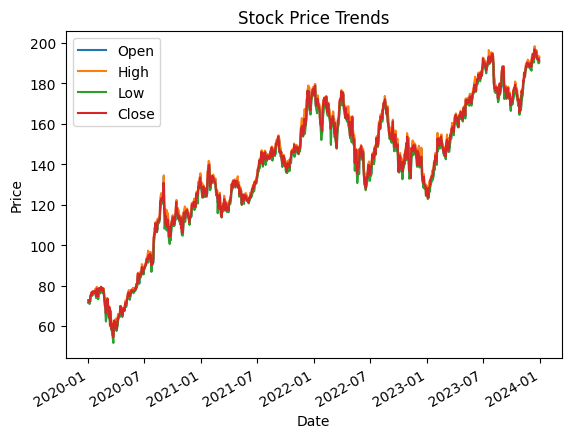

In [11]:
#Visualizing Stock Price Trends
plt.figure(figsize=(12,6))
df[['Open', 'High', 'Low', 'Close']].plot(title="Stock Price Trends")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


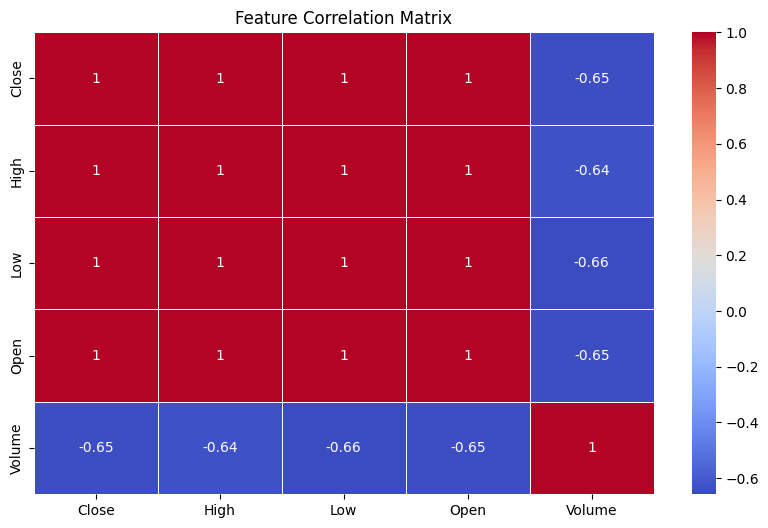

In [12]:
#Check Correlations Between Features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


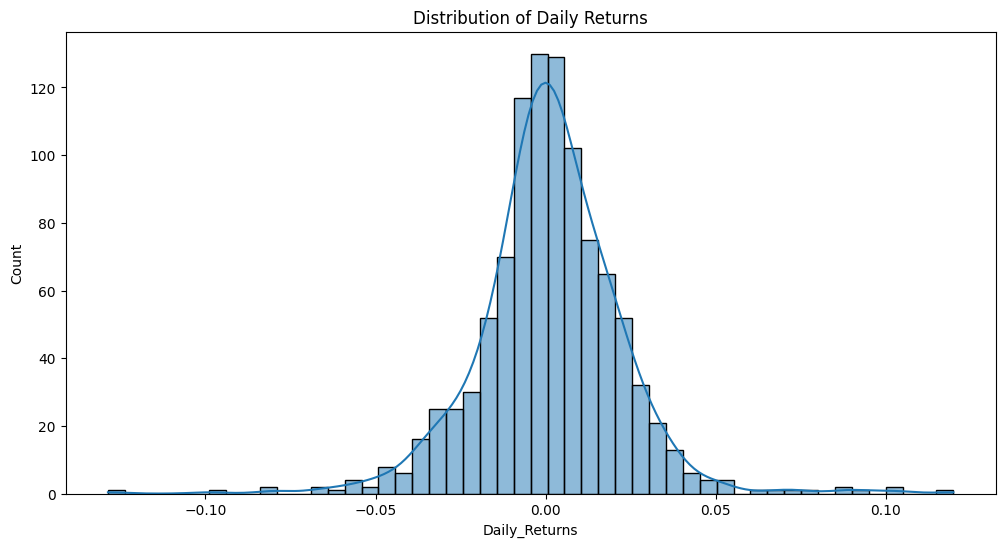

In [14]:
df['Daily_Returns'] = df['Close'].pct_change()
plt.figure(figsize=(12,6))
sns.histplot(df['Daily_Returns'].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.show()

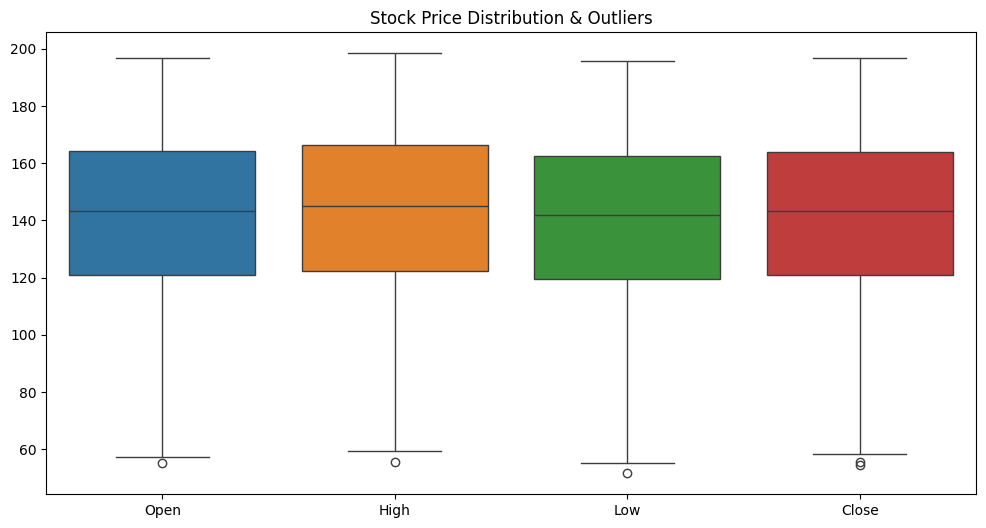

In [ ]:
#for outlier detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title("Stock Price Distribution & Outliers")
plt.show()


In [ ]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Removing outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Columns to check for outliers
columns_to_check = ['Open', 'High', 'Low', 'Close']

# Remove outliers
df_cleaned = remove_outliers_iqr(df, columns_to_check)


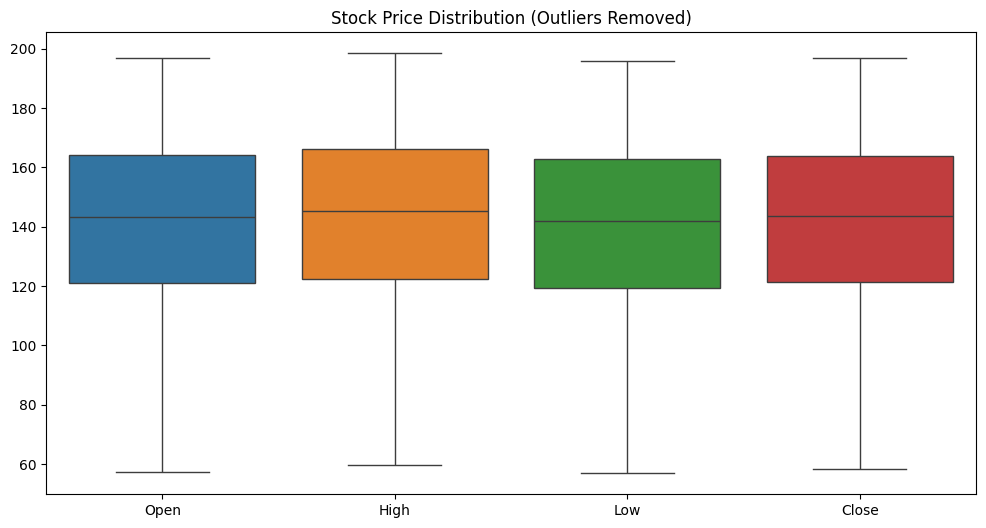

In [ ]:
# Box Plot after Outlier Removal
plt.figure(figsize=(12,6))
sns.boxplot(data=df_cleaned[columns_to_check])
plt.title("Stock Price Distribution (Outliers Removed)")
plt.show()


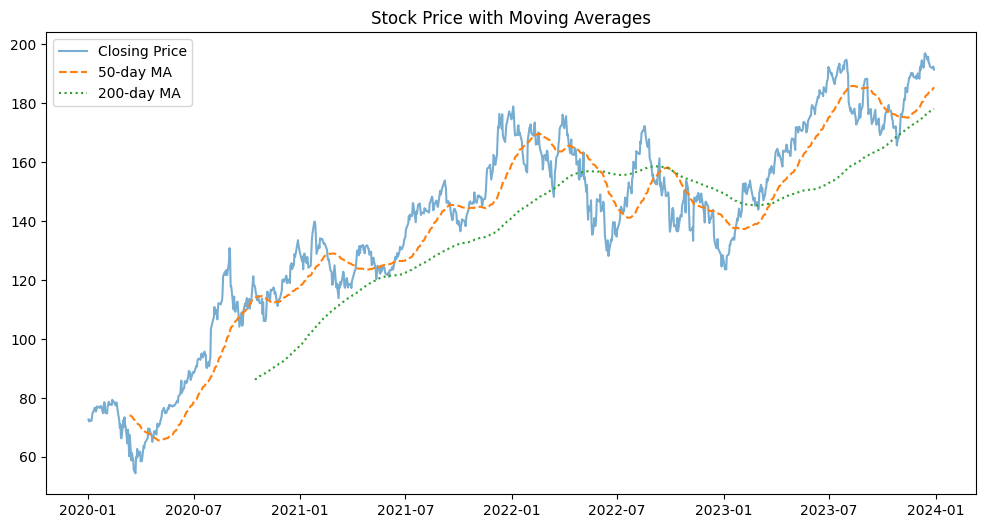

In [ ]:
#Moving Averages for Trend Analysis
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Closing Price', alpha=0.6)
plt.plot(df.index, df['MA50'], label='50-day MA', linestyle='dashed')
plt.plot(df.index, df['MA200'], label='200-day MA', linestyle='dotted')
plt.legend()
plt.title("Stock Price with Moving Averages")
plt.show()


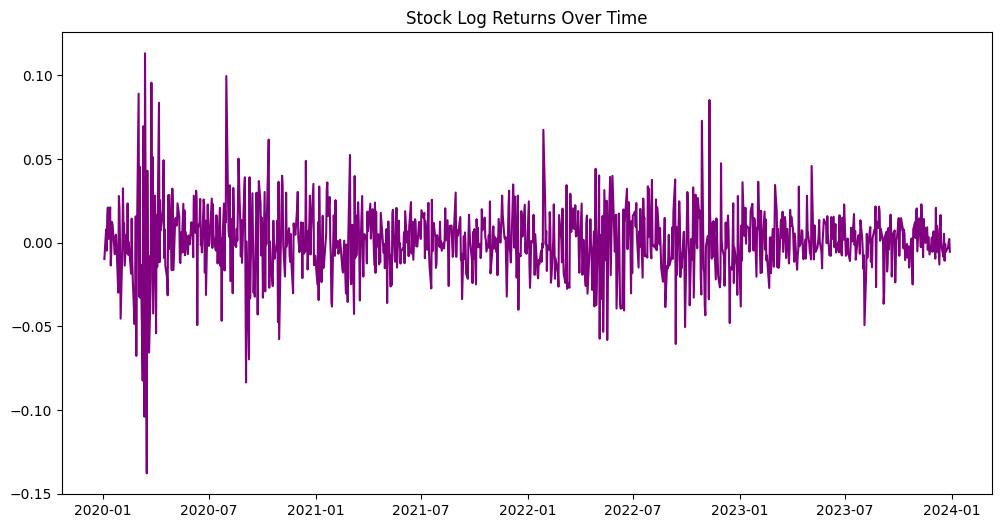

In [ ]:
#Log Returns Calculation for Volatility Analysis
df['Log Returns'] = np.log(df['Close'] / df['Close'].shift(1))

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Log Returns'], label='Log Returns', color='purple')
plt.title("Stock Log Returns Over Time")
plt.show()


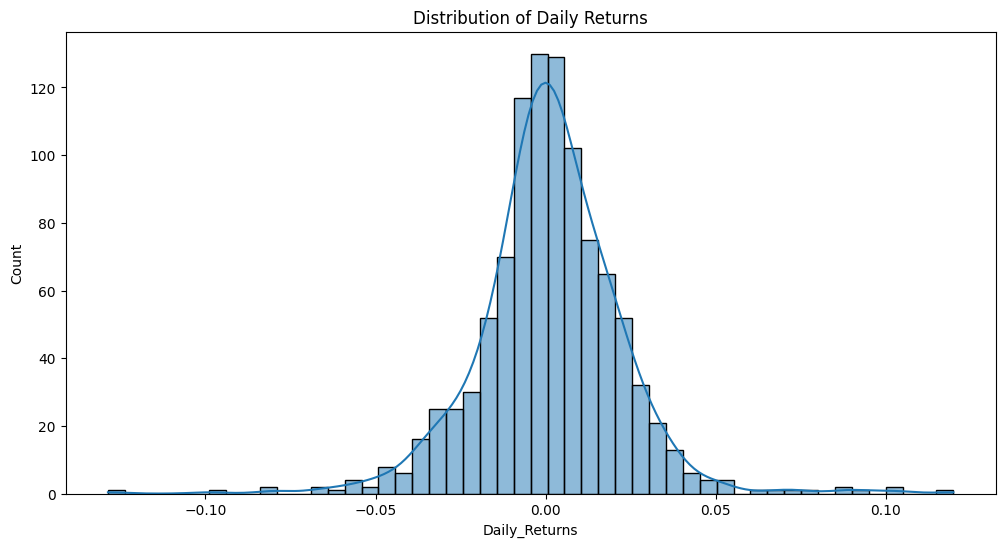

In [ ]:
df['Daily_Returns'] = df['Close'].pct_change()
plt.figure(figsize=(12,6))
sns.histplot(df['Daily_Returns'].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.show()

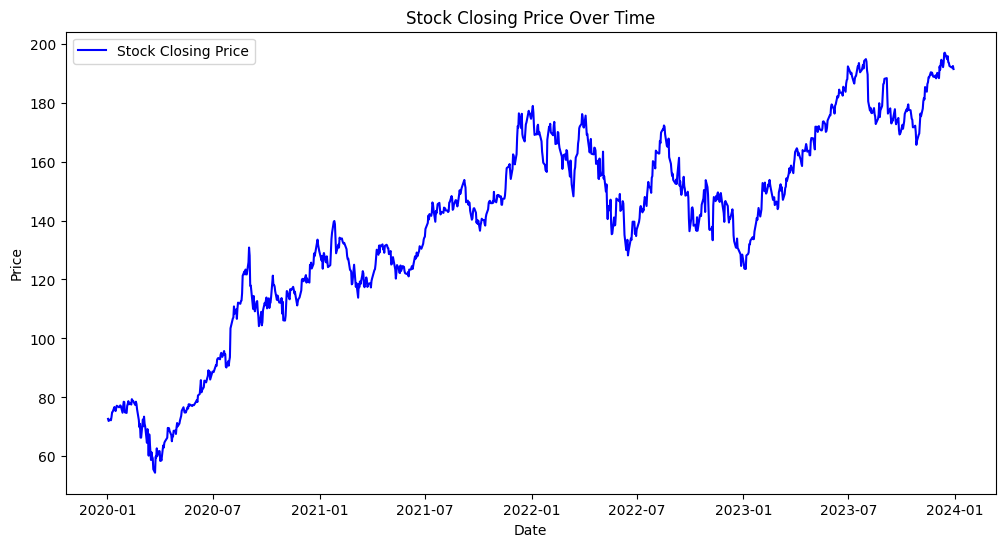

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Stock Closing Price", color="blue")
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
